# 과제 001

주어진 함수를 이용하여 gradient descent 를 직접 구현하고 그래프를 그리시오.


**제출**

구현한 코드가 담긴 colab 파일을 PLATO "텐서플로 과제 제출 01"에 제출하세요. (23/7/6까지)

```
def f(x):
    return x**4 - 3*x**3 +2

def fprime(x):
    h = 0.001
    return (f(x+h) - f(x))/h
```

* 힌트: 교과서 44p를 **참고**

최종해 k=336: f(2.250152587890625)=-6.542968514237657
[f(0), f(9/4), f(-2), f(4)]= [2, -6.54296875, 42, 66]


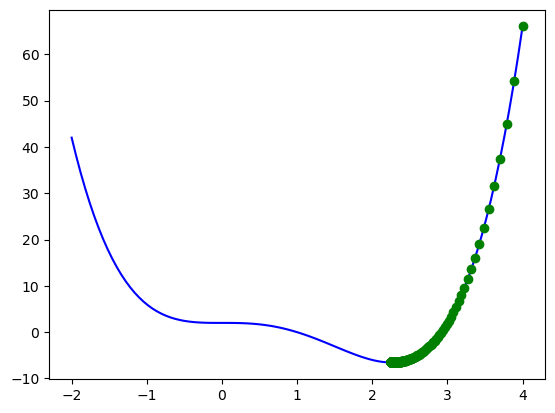

In [20]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

# 함수
def f(x):
    return x**4 - 3*x**3 +2

def fprime(x): # forward difference
    h = 0.001
    return (f(x+h) - f(x))/h

# 조건
k = 0 # 반복 횟수 초기화
mi = 1000 # 최대 반복학습률
lr = 0.001 # 반복 학습률
tol = 1e-5 # 허용오차 크기(종료조건)

xb = 0.0 # 변경 전 x값
xa = 4.0  # 변경 후 x값
xlist= [xa]  # x 값 저장
x = tf.Variable(xa, dtype = tf.float32) # 변수 생성 및 초깃값 설정

while abs(xb-xa)>tol and  k < mi:
    k+=1
    xb= x.numpy() # x 값을 Numpy 배열로 변환
    st = lr * fprime(x)
    x.assign_sub(st, read_value=False) # 값 업데이트(x값 읽지 않음)
    xa= x.numpy()
    xlist.append(xa)

print('최종해','k={}: f({})={}'.format(k, xa, f(xa)))
print("[f(0), f(9/4), f(-2), f(4)]=", [f(0), f(9/4), f(-2), f(4)])
# 그래프 그리기
# f(X)
xs = tf.linspace(-2.0, 4.0, num = 101) # Tensor  
ys = f(xs)
plt.plot(xs, ys,  'b-')

# 결과 값
xlist =tf.constant(xlist, dtype=tf.float32)  # Tensor
y_list = f(xlist) 
plt.plot(xlist, y_list, 'go')
plt.show()
    

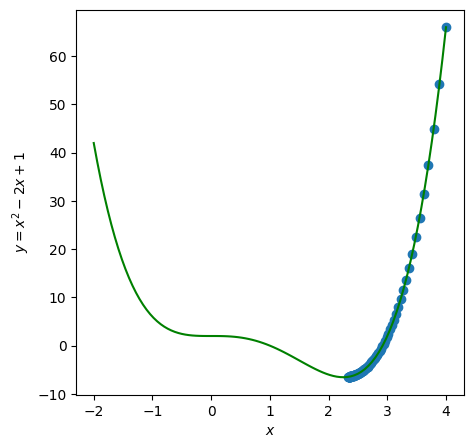

In [21]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

def f(x):
  return x**4 - 3*x**3 +2

def f_prime(x):
  h = 0.001
  return (f(x + h) - f(x)) / h

all_x = tf.linspace(-2.0, 4.0, num = 101)
all_y = f(all_x)

x = tf.Variable(4.0) # initial value
LR = 0.001

x_history, y_history = [], []
for _ in range(100):
  y = f(x)
  step = LR * f_prime(x)

  x_history.append(x.numpy())
  y_history.append(y.numpy())

  x.assign_sub(step)  # x = x - lr*dx

fig, ax = plt.subplots(figsize=(5, 5))
ax.plot(all_x, all_y, '-g')
ax.scatter(x_history, y_history)
plt.xlabel('$x$')
plt.ylabel('$y=x^2-2x+1$')
plt.show()


# 과제 002

주어진 보스톤 주택 가격 데이터 셋을 이용하여 주택 가격을 예측하는 multiple variables regression 을 수행하는 프로그램을 직접 작성하시오.

단, 아래 조건을 만족하여 구현하시오.

* loss 함수: tensorflow 의 MSE
* gradient 계산: tensorflow의 GradientTape()
* optimizer: tensorflow의 Adam

**제출**

구현한 코드가 담긴 colab 파일을 PLATO "텐서플로 과제 제출 01"에 제출하세요. (23/7/6까지)

```python
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# https://www.tensorflow.org/api_docs/python/tf/keras/datasets/boston_housing/load_data
# features 설명 (http://lib.stat.cmu.edu/datasets/boston)
# 보스톤 주택 가격(MEDV) 예측 (1인당 범죄율, 주택당 평균 방 개수, 학생대 교사 비율 등의 features 이용함)
# MEDV(주택 가격 중앙값, 단위: $1,000)

(x_train, y_train), (x_test, y_test) = tf.keras.datasets.boston_housing.load_data(
    path='boston_housing.npz', test_split=0.2, seed=113
)
print('x_train.shape', 'y_train.shape', x_train.shape, y_train.shape)

all_train_data = np.hstack((x_train, y_train.reshape((-1, 1))))
column_names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
df = pd.DataFrame(all_train_data, columns=column_names)
df.head()
sns.pairplot(df[['CRIM', 'ZN', 'INDUS', 'TAX', 'MEDV']], diag_kind='kde')
```

* 힌트:
https://dschloe.github.io/python/tensorflow2.0/ch4_4_boston_housing_deeplearning/

x_train.shape y_train.shape (404, 13) (404,)


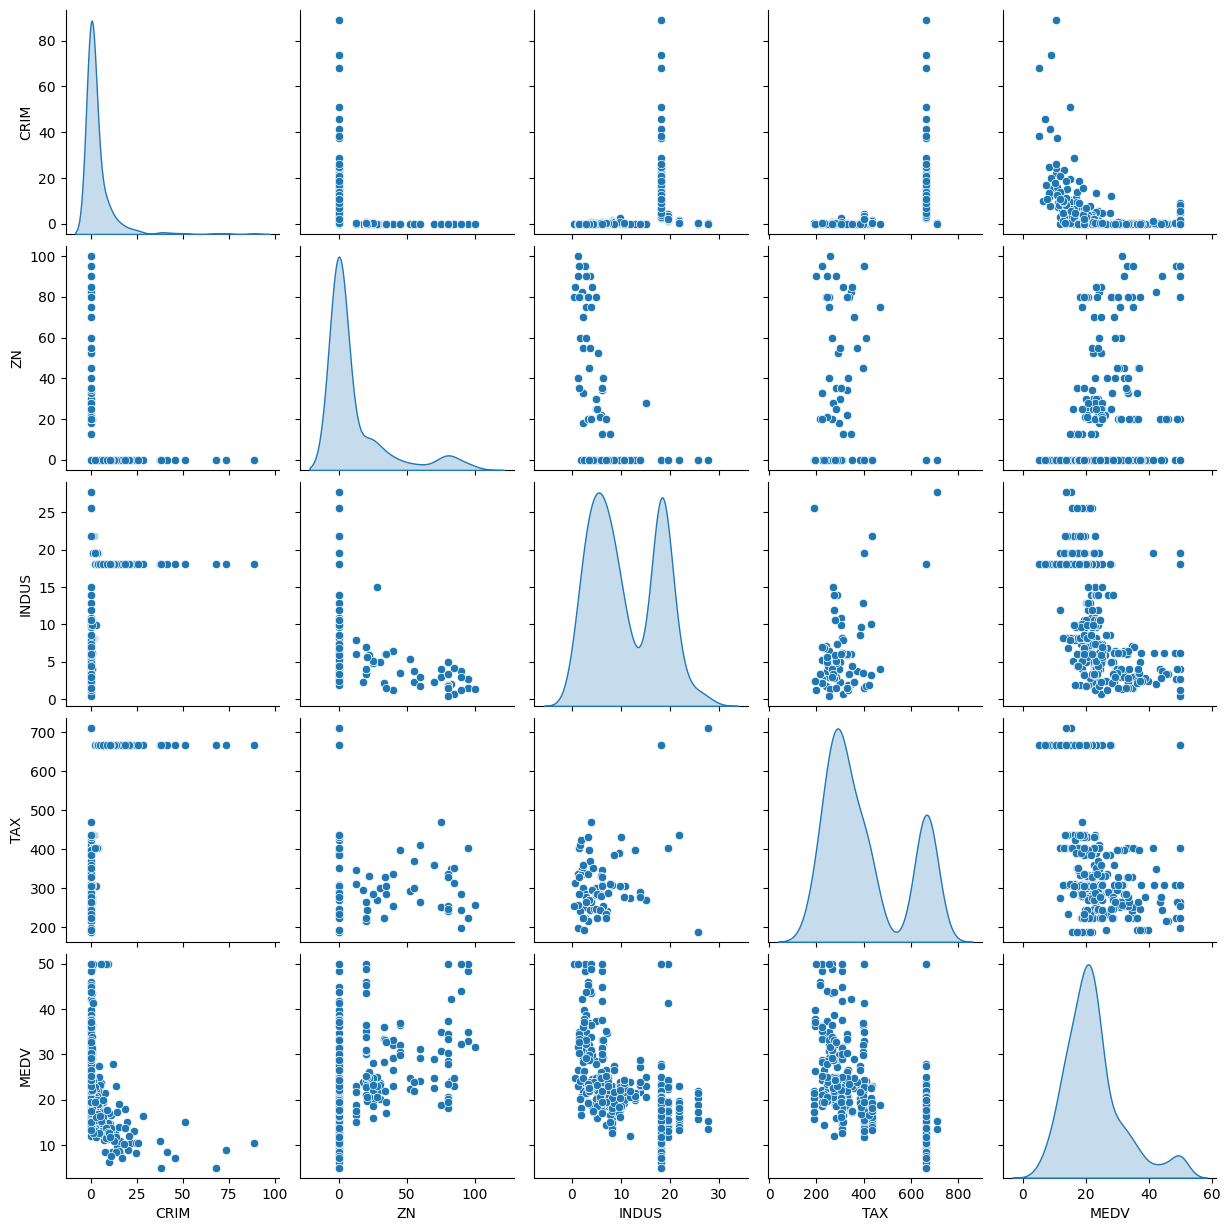

우엥
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 52)                728       
                                                                 
 dense_1 (Dense)             (None, 39)                2067      
                                                                 
 dense_2 (Dense)             (None, 26)                1040      
                                                                 
 dense_3 (Dense)             (None, 1)                 27        
                                                                 
Total params: 3,862
Trainable params: 3,862
Non-trainable params: 0
_________________________________________________________________
Epoch 1/50
10/10 [==============================] - 1s 24ms/step - loss: 0.9259 - val_loss: 1.0338
Epoch 2/50
10/10 [==============================] - 0s 6ms/step - loss: 0.5721 - val

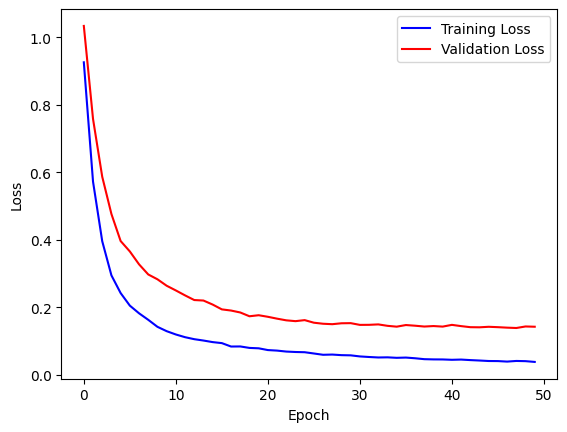

Test Loss: tf.Tensor(1.7864847, shape=(), dtype=float32)


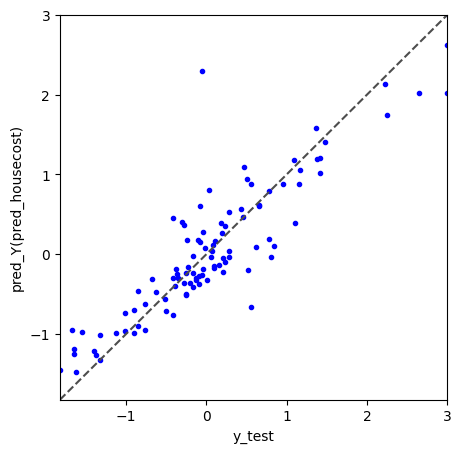

In [1]:
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

(x_train, y_train), (x_test, y_test) = tf.keras.datasets.boston_housing.load_data(
    path='boston_housing.npz', test_split=0.2, seed=113
)

print('x_train.shape', 'y_train.shape', x_train.shape, y_train.shape)


# 데이터 전처리
all_train_data = np.hstack((x_train, y_train.reshape((-1, 1))))
column_names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
df = pd.DataFrame(all_train_data, columns=column_names)
df.head()
# 데이터 시각화
sns.pairplot(df[['CRIM', 'ZN', 'INDUS', 'TAX', 'MEDV']], diag_kind='kde')
plt.show()

# 데이터 정규화
x_mean = x_train.mean(axis=0) # 평균을 계산하여 변수 x_mean에 할당
x_std = x_train.std(axis=0) # 표준 편차를 계산하여 변수 x_std에 할당
x_train -= x_mean # 평균을 빼고 표준 편차로 나누어 데이터를 정규화
x_train /= x_std # x_train과 x_test의 각 원소에서 x_mean을 뺀 후, x_std로 나누어 표준화
x_test -= x_mean
x_test /= x_std

y_mean = y_train.mean(axis=0)
y_std = y_train.std(axis=0)
y_train -= y_mean
y_train /= y_std
y_test -= y_mean
y_test /= y_std

# 모델 정의
model = tf.keras.Sequential([
  tf.keras.layers.Dense(units=52, activation='relu', input_shape=(13, )), 
  tf.keras.layers.Dense(units=39, activation='relu'), 
  tf.keras.layers.Dense(units=26, activation='relu'), 
  tf.keras.layers.Dense(units=1)
])
print('우엥')
model.summary()

# loss 함수 및 옵티마이저 설정
loss_fn = tf.keras.losses.MeanSquaredError()
optimizer = tf.keras.optimizers.Adam()

# 컴파일
model.compile(optimizer=optimizer, loss=loss_fn)

# 학습 함수 정의
@tf.function
def train_step(inputs, targets):
    with tf.GradientTape() as tape:
        predictions = model(inputs)
        loss_value = loss_fn(targets, predictions)
    gradients = tape.gradient(loss_value, model.trainable_variables)
    optimizer.apply_gradients(zip(gradients, model.trainable_variables))
    return loss_value

# 학습
history = model.fit(x_train, y_train, epochs=50, batch_size=32, validation_split=0.25)

# 손실 그래프 출력
plt.plot(history.history['loss'], 'b-', label='Training Loss')
plt.plot(history.history['val_loss'], 'r-', label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# 평가
test_loss = loss_fn(y_test, model(x_test))
print('Test Loss:', test_loss)

# 예측 결과 그래프 출력
pred_Y = model(x_test)

plt.figure(figsize=(5, 5))
plt.plot(y_test, pred_Y, 'b.')
plt.axis([min(y_test), max(y_test), min(y_test), max(y_test)])
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], ls="--", c=".3")
plt.xlabel('y_test')
plt.ylabel('pred_Y(pred_housecost)')
plt.show()
